# **1. Data Understanding**

Pada tahap ini, kita akan memulai dengan memuat dataset kualitas anggur merah, memeriksa struktur dasarnya, dan melakukan eksplorasi awal untuk memahami karakteristik data. Langkah ini sangat penting untuk mengidentifikasi potensi masalah seperti nilai yang hilang, tipe data yang tidak sesuai, atau anomali lainnya sebelum melakukan preprocessing data.

### **1.1. Mengimpor Library**
Mengimpor library yang dibutuhkan untuk menjalankan proyek.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

### **1.2 Meng-upload Dataset**
Dataset yang digunakan diunggah ke lingkungan Google Colab dan diperoleh dari situs [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality). Untuk pelatihan kali ini, digunakan file *winequality-red.csv*.

Dataset 'Wine Quality Red' dimuat dengan menggunakan fungsi `pd.read_csv()` dengan argumen `sep=';'`. Setelah berhasil dimuat, beberapa baris awal dari DataFrame ditampilkan menggunakan `df.head()` untuk memberikan gambaran awal mengenai struktur dan isi data. Langkah ini berguna untuk mengamati nama-nama kolom serta nilai-nilai awal yang terkandung di dalamnya.

In [ ]:
uploaded = files.upload()

In [ ]:
df = pd.read_csv('winequality-red.csv', sep=';')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### **1.3. Informasi Umum Dataset**

Fungsi `df.info()` digunakan untuk menampilkan ringkasan umum dari DataFrame, yang mencakup beberapa aspek penting:

* Total jumlah entri (sampel) dan jumlah kolom yang ada.
* Nama setiap kolom beserta jumlah data non-null di dalamnya, yang berguna untuk mendeteksi adanya nilai yang hilang.
* Jenis data (Dtype) dari masing-masing kolom, seperti `float64`, `int64`, atau `object`.
* Estimasi penggunaan memori oleh DataFrame.

Melalui output dari `df.info()`, kita dapat dengan cepat mengetahui apakah ada kolom yang memiliki nilai non-null lebih sedikit dari jumlah total entri, yang menandakan keberadaan data yang hilang.


In [ ]:
print("\nInformasi Umum Dataset:")
df.info()


Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### **1.4. Statistik Deskriptif**

Fungsi `df.describe()` menghasilkan ringkasan statistik deskriptif untuk kolom-kolom numerik dalam dataset, yang mencakup:

* **count**: Jumlah data non-null.
* **mean**: Nilai rata-rata.
* **std**: Standar deviasi.
* **min**: Nilai terkecil.
* **25%, 50%, 75%**: Nilai kuartil, termasuk median (50%).
* **max**: Nilai terbesar.

Statistik ini membantu memahami distribusi data, mengidentifikasi kemungkinan adanya outlier, serta mengetahui rentang nilai dari tiap fitur. Misalnya, jika ditemukan fitur dengan rentang nilai yang sangat besar, hal ini dapat menjadi pertimbangan untuk dilakukan proses scaling pada tahap preprocessing.


In [ ]:
print("\nStatistik Deskriptif Dataset:")
df.describe()


Statistik Deskriptif Dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### **1.5. Memeriksa Missing Values**

Mengetahui adanya missing values (NaN/null) dalam dataset sangat penting karena dapat berdampak negatif pada kinerja model machine learning. Untuk mendeteksinya, digunakan fungsi `df.isnull().sum()` yang menghitung jumlah missing values di setiap kolom. Jika ditemukan kolom dengan nilai null, maka perlu ditentukan langkah penanganan yang sesuai pada tahap data preprocessing, seperti melakukan imputasi atau menghapus baris/kolom yang terpengaruh.

In [ ]:
print("\nJumlah Missing Values per Kolom:")
df.isnull().sum()


Jumlah Missing Values per Kolom:


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


### **1.6 Memeriksa Data Duplikat**

Data duplikat merujuk pada baris-baris yang identik dan muncul lebih dari satu kali dalam dataset. Keberadaan duplikat dapat memicu bias atau overfitting pada model karena informasi yang sama digunakan berulang kali. Fungsi `df.duplicated().sum()` digunakan untuk menghitung jumlah baris yang terduplikasi. Jika ditemukan duplikat, langkah yang umum dilakukan adalah menghapus baris tersebut agar data yang digunakan lebih akurat dan representatif.

In [ ]:
df.duplicated().sum()

np.int64(240)

### **1.7. Menghapus Data Duplikat**

Untuk memastikan dataset hanya terdiri dari data yang unik dan bebas dari duplikasi, digunakan perintah: `df = df.drop_duplicates()`. Kode ini secara otomatis menghapus seluruh baris yang teridentifikasi sebagai duplikat, lalu menyimpan hasilnya kembali ke variabel `df`. Dengan langkah ini, dataset menjadi lebih bersih dan layak digunakan dalam proses training model.


In [ ]:
df = df.drop_duplicates()


### **1.8. Memeriksa Outlier dengan Metode IQR**

Outlier merupakan nilai-nilai ekstrem yang menyimpang jauh dari sebagian besar data dalam fitur numerik. Keberadaan outlier dapat memengaruhi performa model machine learning, sehingga perlu diidentifikasi dan ditangani dengan tepat.
Salah satu metode umum untuk mendeteksi outlier adalah **Interquartile Range (IQR)**. Langkah ini melibatkan perhitungan batas bawah dan atas sebagai berikut:

* **Batas bawah** = Q1 − 1.5 × IQR
* **Batas atas** = Q3 + 1.5 × IQR

Nilai yang berada di luar rentang tersebut dianggap sebagai outlier. Untuk menemukan baris yang mengandung outlier pada kolom numerik tertentu, dapat digunakan kode berikut:

```python
df[(df[col] < lower_bound) | (df[col] > upper_bound)]
```

Kode ini akan menampilkan baris-baris yang nilai pada kolom tertentu berada di luar batas IQR.


In [ ]:
outlier_summary = {}

for col in df.columns:
    if df[col].dtype != 'object':  # hanya fitur numerik
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary[col] = len(outliers)

print("Jumlah Outlier per Kolom (metode IQR):")
for feature, count in outlier_summary.items():
    print(f"{feature}: {count} outliers")


Jumlah Outlier per Kolom (metode IQR):
fixed acidity: 41 outliers
volatile acidity: 19 outliers
citric acid: 1 outliers
residual sugar: 126 outliers
chlorides: 87 outliers
free sulfur dioxide: 26 outliers
total sulfur dioxide: 45 outliers
density: 35 outliers
pH: 28 outliers
sulphates: 55 outliers
alcohol: 12 outliers
quality: 27 outliers


### **1.9. Menangani Outlier dengan Capping (Winsorizing)**

Setelah outlier teridentifikasi, perlu dilakukan penanganan agar nilai-nilai ekstrem tersebut tidak memberikan dampak negatif terhadap performa model. Salah satu metode yang sering digunakan adalah **capping** atau **winsorizing**, yaitu dengan menggantikan nilai outlier menggunakan batas bawah atau atas yang telah dihitung berdasarkan metode IQR.

Contoh pendekatannya:

* Jika suatu nilai lebih kecil dari batas bawah, maka diganti dengan nilai batas bawah.
* Jika suatu nilai melebihi batas atas, maka diganti dengan nilai batas atas.

Metode ini memungkinkan data tetap utuh tanpa menghapus baris, namun tetap mengurangi pengaruh nilai-nilai ekstrem.
Berikut contoh implementasi kodenya:

```python
df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
```

In [ ]:
def cap_outliers_iqr(df):
    df_capped = df.copy()
    for col in df_capped.columns:
        if df_capped[col].dtype != 'object':
            Q1 = df_capped[col].quantile(0.25)
            Q3 = df_capped[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
            df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])
    return df_capped

df_capped = cap_outliers_iqr(df)

# **2. Data Preparation**

Meskipun dataset ini relatif bebas dari nilai yang hilang, tetap diperlukan beberapa langkah penting agar data benar-benar siap digunakan dalam proses pelatihan model machine learning.

### **2.1. Mendefinisikan Masalah (Klasifikasi Kualitas Anggur)**

Kolom `quality` pada awalnya berisi nilai diskrit antara 3 hingga 8. Nilai ini bisa diperlakukan sebagai masalah regresi atau klasifikasi multi-kelas. Namun, dalam proyek ini, kita menyederhanakannya menjadi **klasifikasi biner** dengan mengelompokkan kualitas anggur ke dalam dua kategori:

* **"Buruk" (0):** Untuk anggur dengan nilai kualitas di bawah 6 (yaitu 3, 4, atau 5).
* **"Baik" (1):** Untuk anggur dengan nilai kualitas 6 atau lebih tinggi (yaitu 6, 7, atau 8).

Proses ini dilakukan dengan menambahkan kolom baru bernama `quality_label`, yang dibuat menggunakan fungsi `apply` berdasarkan nilai pada kolom `quality`. Tujuannya adalah menyederhanakan masalah sehingga lebih mudah dianalisis sebagai klasifikasi dua kelas. Selain itu, distribusi dari label baru juga diperiksa untuk melihat apakah kelas target berada dalam kondisi seimbang atau tidak.

In [ ]:
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0) # 1 for Good, 0 for Bad

print("\nDistribusi Kolom 'quality_label' (0=Bad, 1=Good):")
print(df['quality_label'].value_counts())

print("\n5 Baris Pertama Dataset dengan quality_label baru:")
print(df.head())


Distribusi Kolom 'quality_label' (0=Bad, 1=Good):
quality_label
1    719
0    640
Name: count, dtype: int64

5 Baris Pertama Dataset dengan quality_label baru:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   


### **2.2. Pemisahan Fitur (X) dan Target (y)**

Dalam proses machine learning, dataset biasanya dibagi menjadi dua komponen utama:

* **Fitur (X):** Variabel independen yang digunakan model untuk melakukan prediksi. Pada kasus ini, fitur terdiri dari seluruh kolom yang menggambarkan karakteristik fisik dan kimiawi anggur, kecuali kolom `quality` asli dan kolom `quality_label` yang baru dibuat.
* **Target (y):** Variabel dependen yang menjadi sasaran prediksi, yaitu kolom `quality_label` yang menunjukkan kategori 'Baik' atau 'Buruk'.

Untuk memisahkan fitur dan target, digunakan fungsi `df.drop()` untuk menghilangkan kolom target dari DataFrame fitur (`X`), sementara kolom target disimpan pada variabel `y`. Setelah itu, bentuk (`shape`) dari `X` dan `y` dicetak untuk memastikan bahwa proses pemisahan data telah berjalan dengan benar.

In [ ]:
X = df.drop(['quality', 'quality_label'], axis=1) # Hapus kolom 'quality' asli dan 'quality_label' dari fitur
y = df['quality_label'] # Target adalah kolom 'quality_label'

print("\nBentuk X (Fitur):", X.shape)
print("Bentuk y (Target):", y.shape)
print("\nContoh Fitur (X):")
print(X.head())
print("\nContoh Target (y):")
print(y.head())


Bentuk X (Fitur): (1359, 11)
Bentuk y (Target): (1359,)

Contoh Fitur (X):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol

### **2.3. Pemisahan Data Training dan Testing**

Setelah fitur dan target dipisahkan, langkah berikutnya adalah membagi dataset menjadi dua bagian utama:

* **Train Data:** Digunakan untuk melatih model agar dapat mempelajari pola dari data.
* **Test Data:** Digunakan untuk mengukur performa model pada data yang belum pernah dilihat sebelumnya, sehingga bisa menilai kemampuan model dalam menggeneralisasi.

Pembagian ini dilakukan menggunakan fungsi `train_test_split` dari pustaka `sklearn.model_selection` dengan parameter sebagai berikut:

* `test_size=0.20`, yang berarti 20% data dialokasikan sebagai testing data.
* `random_state=42` untuk memastikan bahwa pembagian data konsisten dan dapat direproduksi setiap kali kode dijalankan.
* `stratify=y` digunakan khusus pada kasus klasifikasi biner agar proporsi kelas pada data training dan testing tetap seimbang dan mencerminkan distribusi kelas di dataset asli.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("\nBentuk X_train:", X_train.shape)
print("Bentuk X_test:", X_test.shape)
print("Bentuk y_train:", y_train.shape)
print("Bentuk y_test:", y_test.shape)

print("\nDistribusi quality_label di X_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi quality_label di X_test:")
print(y_test.value_counts(normalize=True))


Bentuk X_train: (1087, 11)
Bentuk X_test: (272, 11)
Bentuk y_train: (1087,)
Bentuk y_test: (272,)

Distribusi quality_label di X_train:
quality_label
1    0.528979
0    0.471021
Name: proportion, dtype: float64

Distribusi quality_label di X_test:
quality_label
1    0.529412
0    0.470588
Name: proportion, dtype: float64


### **2.4. Feature Scaling (StandardScaler)**

Sebelum melakukan training model, penting untuk menerapkan feature scaling. Proses ini menyesuaikan rentang nilai fitur agar memiliki rata-rata nol dan standar deviasi satu. Scaling sangat penting terutama untuk algoritma yang bergantung pada jarak atau optimasi gradien, seperti Logistic Regression, dan juga dapat memberikan manfaat pada model berbasis tree.


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nBentuk X_train_scaled:", X_train_scaled.shape)
print("Bentuk X_test_scaled:", X_test_scaled.shape)
print("\nContoh X_train_scaled (beberapa baris pertama):")
print(X_train_scaled[:5])


Bentuk X_train_scaled: (1087, 11)
Bentuk X_test_scaled: (272, 11)

Contoh X_train_scaled (beberapa baris pertama):
[[-0.80501297 -0.44005013 -0.82741213 -0.10494156 -0.89140043 -0.94796257
  -1.02254188 -1.6958439  -0.07691719 -0.05106472  0.88279414]
 [-0.80501297 -0.49436004 -1.38563404 -0.82372846 -0.36059695  1.5609402
  -0.25719598 -1.24737265  0.05351804 -0.45496436  0.88279414]
 [-0.06068016 -0.54866994  0.0860419  -0.67997108 -0.14434368  1.0784589
  -0.05114131 -0.366447   -0.40300527 -0.68576415 -0.13101094]
 [-1.14855119  0.10304892 -0.62442235 -0.5362137  -0.22298123  0.98196264
  -0.34550512 -1.90940163  0.05351804  0.9298344   1.06712234]
 [-1.20580756 -0.38574023 -0.52292746 -0.67997108 -0.30161878 -0.85146631
  -1.05197826 -1.31677892  1.9448289  -0.68576415  0.88279414]]


# **3. Modeling**
  Pada tahap ini, kita akan memilih, melatih, dan mengevaluasi beberapa model machine learning untuk memprediksi kualitas anggur. Kita akan mencoba Logistic Regression sebagai baseline, Random Forest Classifier yang akan kita tune, dan XGBoost Classifier yang dikenal memiliki performa tinggi.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("\nBentuk X_train:", X_train.shape)
print("Bentuk X_test:", X_test.shape)
print("Bentuk y_train:", y_train.shape)
print("Bentuk y_test:", y_test.shape)

print("\nDistribusi kelas di y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi kelas di y_test:")
print(y_test.value_counts(normalize=True))


Bentuk X_train: (1087, 11)
Bentuk X_test: (272, 11)
Bentuk y_train: (1087,)
Bentuk y_test: (272,)

Distribusi kelas di y_train:
quality_label
1    0.528979
0    0.471021
Name: proportion, dtype: float64

Distribusi kelas di y_test:
quality_label
1    0.529412
0    0.470588
Name: proportion, dtype: float64


### **3.1. Fungsi untuk Melatih dan Mengevaluasi Model**

Agar tidak melakukan pekerjaan berulang, kita akan membuat sebuah fungsi yang dapat digunakan untuk training serta evaluating model klasifikasi apa pun. Fungsi ini akan menampilkan matrix seperti accuration, confusion matrix, dan classification report.

In [ ]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """
    Melatih model dan mengevaluasinya dengan metrik klasifikasi.

    Args:
        model: Objek model scikit-learn yang akan dilatih.
        X_train: Fitur data pelatihan.
        y_train: Target data pelatihan.
        X_test: Fitur data pengujian.
        y_test: Target data pengujian.
        model_name (str): Nama model untuk ditampilkan di output.
    """
    print(f"\n--- Melatih Model {model_name} ---")
    model.fit(X_train, y_train)
    print(f"Model {model_name} berhasil dilatih.")

    y_pred = model.predict(X_test)

    print(f"\n--- Evaluasi Model {model_name} ---")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Bad (0)', 'Predicted Good (1)'],
                yticklabels=['Actual Bad (0)', 'Actual Good (1)'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    class_report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(class_report)

    return accuracy, y_pred

### **3.2. Pelatihan dan Evaluasi Model Logistic Regression**

Model Logistic Regression akan digunakan sebagai model dasar (baseline) dalam proses pelatihan dan evaluasi.


--- Melatih Model Logistic Regression ---
Model Logistic Regression berhasil dilatih.

--- Evaluasi Model Logistic Regression ---
Accuracy: 0.7353

Confusion Matrix:
[[ 95  33]
 [ 39 105]]


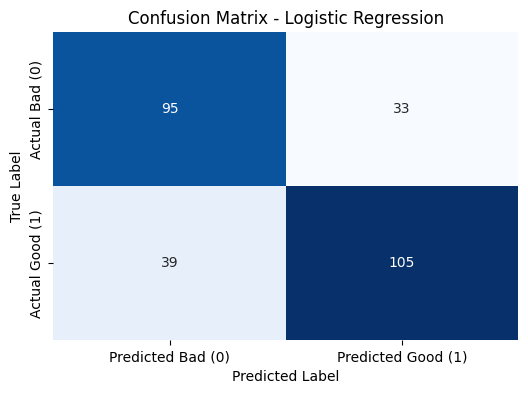


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       128
           1       0.76      0.73      0.74       144

    accuracy                           0.74       272
   macro avg       0.73      0.74      0.73       272
weighted avg       0.74      0.74      0.74       272



In [ ]:
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' cocok untuk dataset kecil

accuracy_lr, y_pred_lr = train_and_evaluate_model(
    log_reg_model, X_train_scaled, y_train, X_test_scaled, y_test, "Logistic Regression"
)

### **3.3. Pelatihan dan Evaluasi Model Random Forest Classifier**

Untuk melakukan penyetelan hyperparameter, kita akan memanfaatkan `GridSearchCV` dengan `param_grid` yang berisi beberapa parameter berikut:

* `n_estimators`: Jumlah pohon keputusan yang akan dibuat dalam hutan.
* `max_features`: Banyaknya fitur yang dipertimbangkan saat melakukan pemisahan pada setiap node.
* `max_depth`: Kedalaman maksimal dari setiap pohon.
* `min_samples_split`: Jumlah minimum sampel yang diperlukan untuk membagi sebuah node internal.
* `min_samples_leaf`: Jumlah minimum sampel yang harus ada pada setiap node daun.


--- Memulai Hyperparameter Tuning untuk Random Forest (GridSearchCV) ---
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Hyperparameter Tuning Random Forest selesai.

Parameter Terbaik (Random Forest): {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

--- Melatih Model Random Forest (Tuned) ---
Model Random Forest (Tuned) berhasil dilatih.

--- Evaluasi Model Random Forest (Tuned) ---
Accuracy: 0.7721

Confusion Matrix:
[[101  27]
 [ 35 109]]


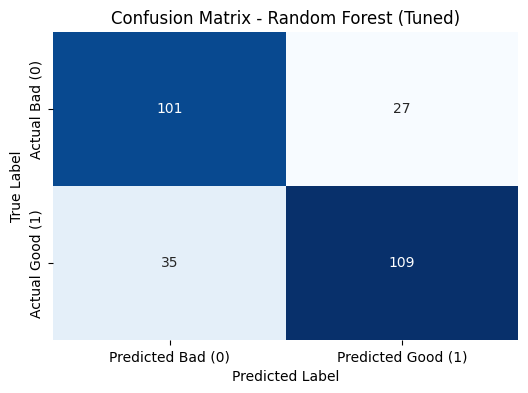


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       128
           1       0.80      0.76      0.78       144

    accuracy                           0.77       272
   macro avg       0.77      0.77      0.77       272
weighted avg       0.77      0.77      0.77       272



In [ ]:
# Definisikan parameter grid untuk tuning Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inisialisasi model Random Forest
rf_model_base = RandomForestClassifier(random_state=42)

# Inisialisasi GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model_base, param_grid=param_grid_rf,
                              cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

print("\n--- Memulai Hyperparameter Tuning untuk Random Forest (GridSearchCV) ---")
grid_search_rf.fit(X_train_scaled, y_train)
print("Hyperparameter Tuning Random Forest selesai.")

# Mendapatkan model Random Forest terbaik dari GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

print("\nParameter Terbaik (Random Forest):", grid_search_rf.best_params_)

# Latih dan evaluasi model Random Forest terbaik
accuracy_rf, y_pred_rf = train_and_evaluate_model(
    best_rf_model, X_train_scaled, y_train, X_test_scaled, y_test, "Random Forest (Tuned)"
)

### **3.4. Pelatihan dan Evaluasi Model XGBoost Classifier**

XGBoost merupakan algoritma boosting yang efektif dan kuat, yang membangun serangkaian pohon keputusan secara berurutan untuk memperbaiki kesalahan pada iterasi sebelumnya. Untuk meningkatkan performanya, kita akan melakukan penyetelan hyperparameter menggunakan `GridSearchCV`.

Berikut adalah hyperparameter utama yang akan dioptimalkan beserta rentang nilainya:

* `n_estimators`: Jumlah pohon yang dibangun (`[100, 200, 300]`).
* `learning_rate`: Besaran langkah pembelajaran (`[0.01, 0.05, 0.1]`).
* `max_depth`: Kedalaman maksimal pohon (`[3, 5, 7]`).
* `subsample`: Proporsi sampel data yang digunakan untuk setiap pohon (`[0.7, 0.8, 0.9]`).
* `colsample_bytree`: Proporsi kolom atau fitur yang digunakan pada tiap pohon (`[0.7, 0.8, 0.9]`).
* `gamma`: Ambang batas pengurangan loss minimum untuk melakukan pemisahan node (`[0, 0.1, 0.2]`).

Setelah `GridSearchCV` menentukan kombinasi hyperparameter terbaik, model XGBoost hasil tuning akan dievaluasi untuk memperoleh akurasi akhir dan metrik performa lainnya.



--- Memulai Hyperparameter Tuning untuk XGBoost (GridSearchCV) ---
Fitting 5 folds for each of 729 candidates, totalling 3645 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:49:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Hyperparameter Tuning XGBoost selesai.

Parameter Terbaik (XGBoost): {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}

--- Melatih Model XGBoost (Tuned) ---
Model XGBoost (Tuned) berhasil dilatih.

--- Evaluasi Model XGBoost (Tuned) ---
Accuracy: 0.7831

Confusion Matrix:
[[100  28]
 [ 31 113]]


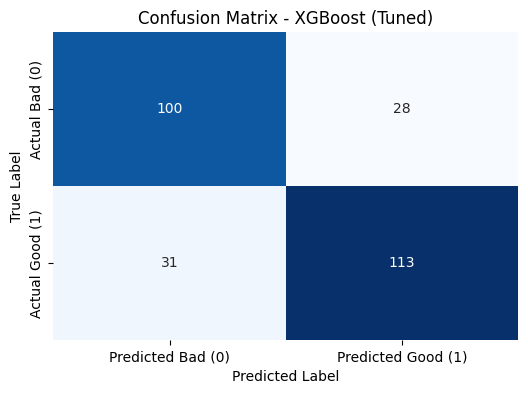


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       128
           1       0.80      0.78      0.79       144

    accuracy                           0.78       272
   macro avg       0.78      0.78      0.78       272
weighted avg       0.78      0.78      0.78       272



In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# Inisialisasi model XGBoost
xgb_model_tuned = xgb.XGBClassifier(objective='binary:logistic',
                                    use_label_encoder=False,
                                    eval_metric='logloss',
                                    random_state=42)

# Inisialisasi GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model_tuned, param_grid=param_grid_xgb,
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Latih GridSearchCV pada data training yang sudah di-scaling
print("\n--- Memulai Hyperparameter Tuning untuk XGBoost (GridSearchCV) ---")
grid_search_xgb.fit(X_train_scaled, y_train)
print("Hyperparameter Tuning XGBoost selesai.")

# Menampilkan parameter terbaik yang ditemukan
print("\nParameter Terbaik (XGBoost):", grid_search_xgb.best_params_)

# Mendapatkan model terbaik
best_xgb_model = grid_search_xgb.best_estimator_

# Latih dan evaluasi model XGBoost terbaik
accuracy_best_xgb, y_pred_best_xgb = train_and_evaluate_model(
    best_xgb_model, X_train_scaled, y_train, X_test_scaled, y_test, "XGBoost (Tuned)"
)

# **4. Evaluation**

Setelah proses pelatihan dan penyetelan beberapa model selesai, tahap berikutnya adalah menilai performa masing-masing model dan melakukan perbandingan. Kita akan mengamati akurasi total dan membuat visualisasi untuk memudahkan perbandingan.

### **4.1. Ringkasan Kinerja Model**

Kita akan mengumpulkan dan menyajikan akurasi dari ketiga model yang sudah dilatih, yaitu Logistic Regression, Random Forest hasil tuning, dan XGBoost hasil tuning. Dengan ini, kita bisa memperoleh gambaran model mana yang memiliki performa terbaik.

In [ ]:
model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest (Tuned)', 'XGBoost (Tuned)'], # <-- Nama model final yang konsisten
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_best_xgb]
})
model_performance = model_performance.sort_values(by='Accuracy', ascending=False)

print("\n--- Ringkasan Performa Model ---")
print(model_performance)


--- Ringkasan Performa Model ---
                   Model  Accuracy
2        XGBoost (Tuned)  0.783088
1  Random Forest (Tuned)  0.772059
0    Logistic Regression  0.735294


### **4.2. Visualisasi Perbandingan Akurasi Model**

Agar lebih mudah dalam memahami hasil, kita akan menampilkan perbandingan akurasi model dalam bentuk grafik batang. Visualisasi ini memudahkan kita untuk langsung melihat model mana yang menunjukkan performa paling unggul.


--- Visualisasi Perbandingan Akurasi Model ---


<ipython-input-24-28d0ad4c27a0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=model_performance, palette='viridis') # Membuat bar plot


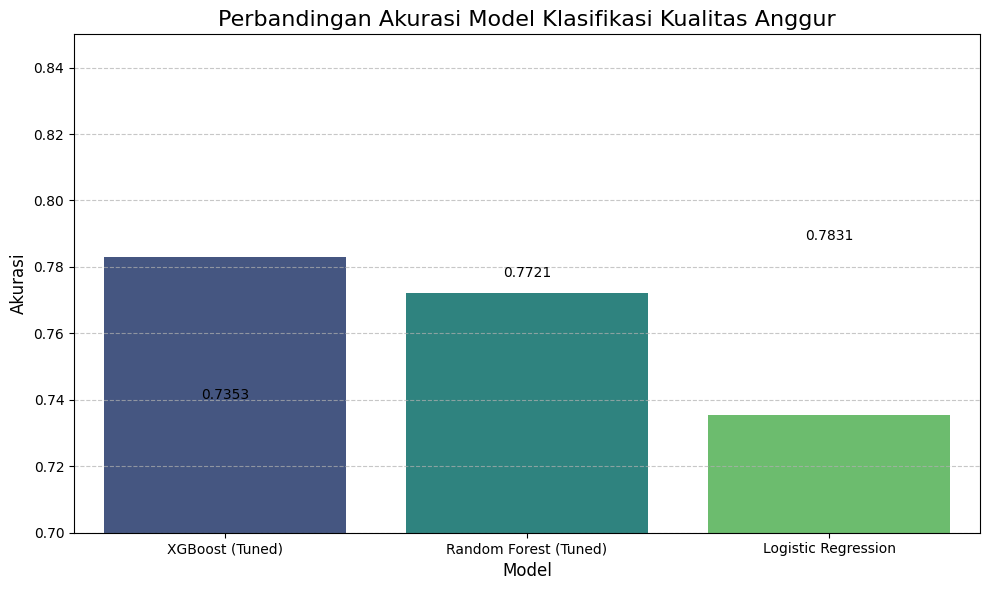

In [ ]:
print("\n--- Visualisasi Perbandingan Akurasi Model ---")

plt.figure(figsize=(10, 6)) # Ukuran plot
sns.barplot(x='Model', y='Accuracy', data=model_performance, palette='viridis') # Membuat bar plot
plt.ylim(0.70, 0.85) # Mengatur batas sumbu y untuk fokus pada rentang akurasi yang relevan
plt.title('Perbandingan Akurasi Model Klasifikasi Kualitas Anggur', fontsize=16) # Judul plot
plt.xlabel('Model', fontsize=12) # Label sumbu x
plt.ylabel('Akurasi', fontsize=12) # Label sumbu y

# Menambahkan nilai akurasi di atas setiap bar
for index, row in model_performance.iterrows():
    plt.text(index, row['Accuracy'] + 0.005, f"{row['Accuracy']:.4f}", color='black', ha="center")

plt.grid(axis='y', linestyle='--', alpha=0.7) # Menambahkan grid pada sumbu y
plt.tight_layout() # Menyesuaikan tata letak agar rapi
plt.show() # Menampilkan plot

### **4.3. Analisis Pentingnya Fitur (Model Terbaik)**

Untuk mengerti alasan di balik prediksi model terbaik kita (dalam hal ini XGBoost), kita bisa memeriksa feature importances. Informasi ini menunjukkan tingkat pengaruh setiap fitur terhadap keputusan model. Fitur dengan nilai *importance* yang lebih tinggi memiliki peran lebih besar dalam menentukan prediksi kualitas anggur.


--- Feature Importances (XGBoost) ---
                 Feature  Importance
10               alcohol    0.222109
9              sulphates    0.118566
1       volatile acidity    0.091380
6   total sulfur dioxide    0.084098
7                density    0.078234
8                     pH    0.071196
4              chlorides    0.069561
5    free sulfur dioxide    0.068759
0          fixed acidity    0.067515
2            citric acid    0.066262
3         residual sugar    0.062320


<ipython-input-25-bbf9fa2365de>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


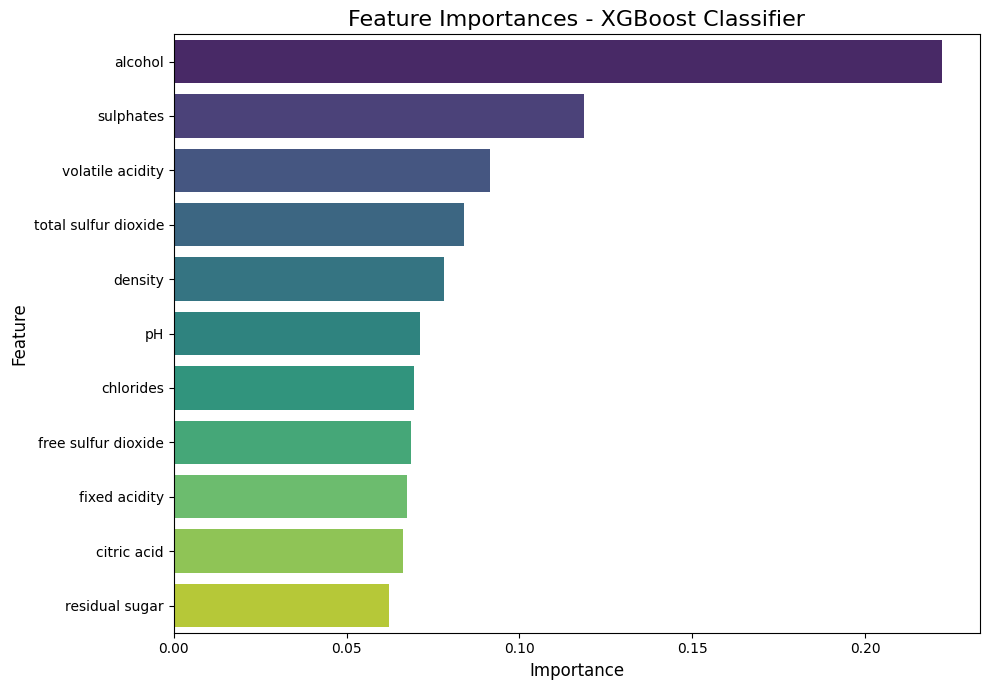

In [ ]:
# Setelah best_xgb_model (atau best_rf_model) dilatih
if hasattr(best_xgb_model, 'feature_importances_'):
    feature_importances = best_xgb_model.feature_importances_
    features = X.columns # Asumsikan X adalah DataFrame asli sebelum scaling

    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    print("\n--- Feature Importances (XGBoost) ---")
    print(importance_df)

    plt.figure(figsize=(10, 7))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title('Feature Importances - XGBoost Classifier', fontsize=16)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.show()